In [1]:
# %load_ext autoreload
# %autoreload 2

import numpy as np
import pylab as plt
import torch
from tqdm.auto import tqdm

from nde.kernels import load_fmnist_all, KernelPredictor, KernelType

In [2]:
X, Y = load_fmnist_all()
ker = KernelPredictor(X, Y)

In [3]:
len(Y)

70000

In [11]:
I_te = range(0, 10000)
I_tr = range(10000, 10000+50000)
preds = ker.predict(I_tr, I_te, ktype=KernelType.GAUSSIAN, sigma=0.15)

In [15]:
(preds == ker.y[I_te]).mean()

0.9077

In [3]:
def get_acc(ntrain=5000, nte=5000, sigma=1.0, ktype=KernelType.GAUSSIAN):
    I_tr=range(ntrain)
    I_te=range(ntrain, ntrain+nte)
    ytrue= ker.y[I_te]
    preds = ker.predict(I_tr, I_te, ktype=ktype, sigma=sigma)
    return np.mean(preds == ytrue)

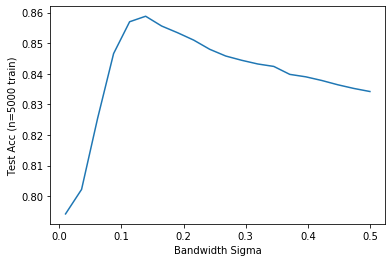

In [24]:
s = np.linspace(0.01, 0.5, 20)
accs = [get_acc(sigma=sig) for sig in tqdm(s)]
plt.plot(s, accs)
plt.ylabel('Test Acc (n=5000 train)');
plt.xlabel('Bandwidth Sigma');

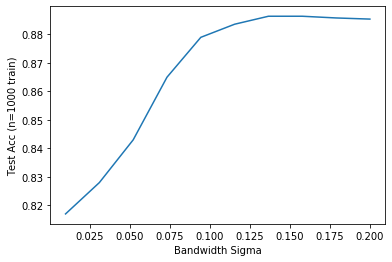

In [17]:
s = np.linspace(0.01, 0.2, 10)
accs = [get_acc(sigma=sig, ntrain=10000) for sig in tqdm(s)]
plt.plot(s, accs)
plt.ylabel('Test Acc (n=1000 train)');
plt.xlabel('Bandwidth Sigma');

In [21]:
I_tr = range(0, 10000)
I_te = range(len(I_tr), len(I_tr)+10000)
preds = ker.predict(I_tr, I_te, ktype=KernelType.GAUSSIAN, sigma=0.1)
print('acc:', (preds == ker.y[I_te]).mean())

acc: 0.8794


In [ ]:
I_tr = range(0, 5000)
I_te = range(len(I_tr), len(I_tr)+10000)
preds = ker.predict(I_tr, I_te, ktype=KernelType.LAPLACE, sigma=0.1)
print('acc:', (preds == ker.y[I_te]).mean())

## Laplace

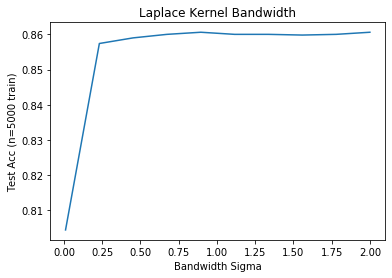

In [6]:
s = np.linspace(0.01, 2, 10)
accs = [get_acc(sigma=sig, ktype=KernelType.LAPLACE) for sig in tqdm(s)]
plt.plot(s, accs)
plt.ylabel('Test Acc (n=5000 train)');
plt.xlabel('Bandwidth Sigma');
plt.title('Laplace Kernel Bandwidth');